# Iris Data Set
### Learn KNN, cross-validation, and make a prediction based the training model

In [1]:
# loading libraries
# Note: people usually use acronym for common library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# For the big packages, people will only load the part of it, otherwise it takes time to load whole packages
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'flower']
dataset = pd.read_csv(url, names=names)

In [4]:
# People ususally use head to check first 5 row to see if they import the data correctly or not
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Also the dimension of the data
dataset.shape

(150, 5)

In [6]:
# [row, column]
# use "data" instead of "array" because array can be a datatype
data = dataset.values
X = data[:,0:4] # Note ":" means all, 0:4 means index 0,1,2,3 (end index is exclusive)
Y = data[:,4]

In [7]:
# 4 outputs for utility (class: train_test_split)
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 42)

## What is KNN?

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

## Cross-Validation: Select the best model

The concept of 'Training/Cross-Validation/Test' Data Sets is as simple as this. When you have a large data set, it's recommended to split it into 3 parts:

1. Training set (60% of the original data set): This is used to build up our prediction algorithm. Our algorithm tries to tune itself to the quirks of the training data sets. In this phase we usually create multiple algorithms in order to compare their performances during the Cross-Validation Phase.

2. Cross-Validation set (20% of the original data set): This data set is used to compare the performances of the prediction algorithms that were created based on the training set. We choose the algorithm that has the best performance.

3. Test set (20% of the original data set): Now we have chosen our preferred prediction algorithm but we don't know yet how it's going to perform on completely unseen real-world data. So, we apply our chosen prediction algorithm on our test set in order to see how it's going to perform so we can have an idea about our algorithm's performance on unseen data.

Notes:
1. It's very important to keep in mind that skipping the test phase is not recommended, because the algorithm that performed well during the cross-validation phase doesn't really mean that it's truly the best one, because the algorithms are compared based on the cross-validation set and its quirks and noises...

2. During the Test Phase, the purpose is to see how our final model is going to deal in the wild, so in case its performance is very poor we should repeat the whole process starting from the Training Phase.

https://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set

## So ... what K value is the best for KNN? (Cross-validation can tell us)

In [8]:
# Create a list of K values
K_list = list(range(1,11))
K_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [9]:
# empty list that will hold cv scores
cv_scores = []

In [10]:
# perform 10-fold cross validation
# Scan different hyperparameter K value from 1 to 10 (K_list)

for i in K_list:
    knn = KNeighborsClassifier(n_neighbors = i) # where n_neighbors is hyperparameter 
    scores = model_selection.cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy') # Note: cv= int, cross-validation
    cv_scores.append(scores.mean()) # Note: append = add one element at the end of the list
cv_scores

[0.94155011655011633,
 0.93321678321678314,
 0.94988344988344997,
 0.94988344988344997,
 0.94988344988344997,
 0.95821678321678316,
 0.94155011655011633,
 0.94988344988344975,
 0.94988344988344997,
 0.94155011655011633]

In [11]:
# Find out the Mean-Square-Error (MSE)
MSE = [1 - x for x in cv_scores]
MSE

[0.058449883449883666,
 0.066783216783216859,
 0.050116550116550029,
 0.050116550116550029,
 0.050116550116550029,
 0.041783216783216837,
 0.058449883449883666,
 0.050116550116550251,
 0.050116550116550029,
 0.058449883449883666]

In [12]:
# determining best k
best_K = K_list[MSE.index(min(MSE))]
best_K

6

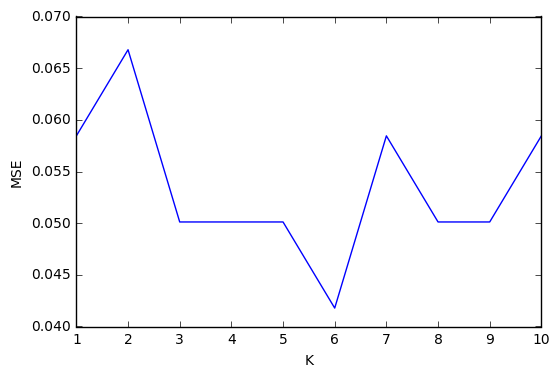

In [13]:
# Vidualize: Plot Mean-Square-Error (MSE) vs Number of Neighbors (K)
plt.plot(K_list, MSE)
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

### 1. Use the best K to train the model 
### 2. Use the test set to juduge the accuracy of the model

In [14]:
# instantiate learning model
knn = KNeighborsClassifier(n_neighbors = best_K) 

# fitting the model
knn.fit(X_train, Y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print (accuracy_score(Y_test, pred))

1.0


Note: Since the accuracy is high in KNN, so you might see accuracy = 1 no matter how you change n_neighbors 

## Vidualize KNN - use only 2 features to build the model

In [15]:
# choose 2 features to classify
features_indexes = [0,1]

# Plotting decision regions with resolution 0.1
x_min, x_max = X[:, features_indexes[0]].min() - 1, X[:, features_indexes[0]].max() + 1
y_min, y_max = X[:, features_indexes[1]].min() - 1, X[:, features_indexes[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [16]:
# instantiate learning model
knn = KNeighborsClassifier(n_neighbors = 2) # use 2 nearest neighbor, easy to tell in the plot

# Train the model with 2 features
knn.fit(X_train[:, features_indexes], Y_train)

## Z is the predict result for each mesh point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', ..., 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [17]:
# Note
# Use numpy to zip the xx, yy into this form
np.c_[xx.ravel(), yy.ravel()]

array([[ 3.3,  1. ],
       [ 3.4,  1. ],
       [ 3.5,  1. ],
       ..., 
       [ 8.6,  5.3],
       [ 8.7,  5.3],
       [ 8.8,  5.3]])

In [18]:
Z1 = pd.factorize(Z,sort=True) # Note: need to use sort to make sure the flower type in predict and original Y with same lablel
Z1

(array([0, 0, 0, ..., 2, 2, 2]),
 array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object))

In [19]:
zz = Z1[0].reshape(xx.shape)
zz

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ..., 
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

In [20]:
# Note: those numerial labels are in the same order with Y
pd.factorize(Z, sort=True)

(array([0, 0, 0, ..., 2, 2, 2]),
 array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object))

In [21]:
# Note
pd.factorize(Y, sort=True)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object))

C:\USERS\MAPLE\ANACONDA3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\USERS\MAPLE\ANACONDA3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


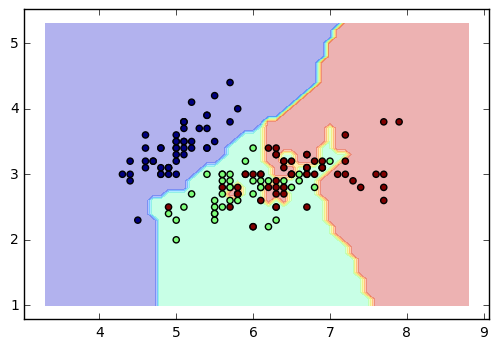

In [22]:
# plot the backgournd = scan by xx, yy and the results are predictions ps. zz are labeled data (3 types of flower)
plt.contourf(xx, yy, zz, alpha=0.3)

# plot the real data with labels (3 types of flower)
plt.scatter(X[:, features_indexes[0]], X[:, features_indexes[1]], c = pd.factorize(Y)[0])

# Show the plot
plt.show()

the error 6385: MaskedArrayFutureWarning is caused by the latest numpy. Will not affect the results.